<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS688/blob/main/Question4-AssociationRuleMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("easyPubMed")
install.packages("tm")
install.packages("qdap")
install.packages("arules")
install.packages("arulesSequences")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘data.table’, ‘openNLPdata’, ‘rJava’, ‘zip’, ‘bitops’, ‘plyr’, ‘qdapDictionaries’, ‘qdapRegex’, ‘qdapTools’, ‘chron’, ‘gender’, ‘gridExtra’, ‘igraph’, ‘openNLP’, ‘openxlsx’, ‘plotrix’, ‘RCurl’, ‘reshape2’, ‘stringdist’, ‘venneuler’, ‘wordcloud’, ‘XML’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# @title Get Pubmed data across years
library(easyPubMed)
library(arules)
library(arulesSequences)
library(dplyr)
years <- c(2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011)
xx <-list()
datalist <- list()
i<-0
for (year in 1:5)
{
  my_query <- paste("((", years[year], "[Date - Create]))", sep = "")
  print(my_query)
  my_entrez_id <- get_pubmed_ids(my_query)
  my_abstracts_xml <- fetch_pubmed_data(my_entrez_id,retstart = 0,  format = "xml", retmax = 100)
  my_PM_list <- articles_to_list(pubmed_data = my_abstracts_xml)
  xx <- lapply(my_PM_list, article_to_df, autofill = TRUE, max_chars = 50)
  full_df <- do.call(rbind, xx)
  datalist[[year]] <- full_df[seq(1, 100, by = 1), c("year", "month", "title", "day")]
}
all_years = do.call(rbind, datalist)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write



Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "((2020[Date - Create]))"
[1] "((2019[Date - Create]))"
[1] "((2018[Date - Create]))"
[1] "((2017[Date - Create]))"
[1] "((2016[Date - Create]))"


In [ ]:
# @title Find unique records
all_years <- unique(all_years)
all_years

In [5]:
# @title Reindex
row.names(all_years) <- NULL

Loading required package: qdapDictionaries

Loading required package: qdapRegex


Attaching package: ‘qdapRegex’


The following object is masked from ‘package:dplyr’:

    explain


Loading required package: qdapTools


Attaching package: ‘qdapTools’


The following object is masked from ‘package:dplyr’:

    id


Loading required package: RColorBrewer


Attaching package: ‘qdap’


The following object is masked from ‘package:Matrix’:

    %&%


The following objects are masked from ‘package:base’:

    Filter, proportions




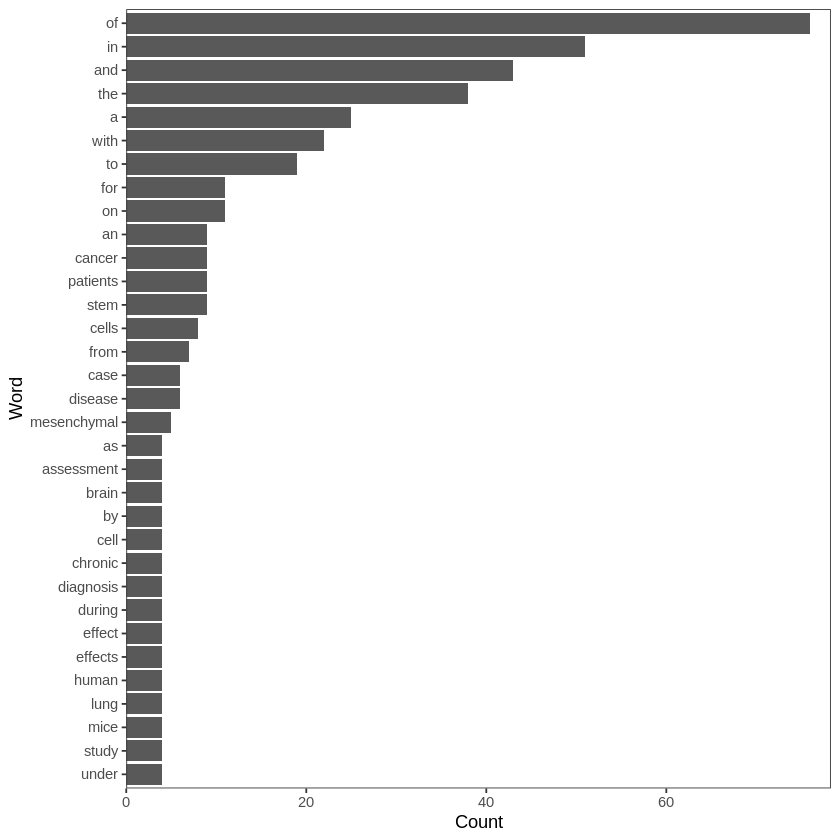

In [6]:
library(qdap)
frequent_terms <- freq_terms(all_years$title, 30)
plot(frequent_terms)

In [ ]:
library(tm)
text_vec <- VectorSource(all_years$title)
vec_corpus <- VCorpus(text_vec)

In [8]:
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, removeNumbers)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, stopwords("en"))
  print(corpus)
    return(corpus)
}
# Apply your customized function to the tweet_corp: clean_corp
clean_corp <- clean_corpus(vec_corpus)
clean_corp

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 93


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 93

In [9]:
# @title Create the DTM from the corpus: 
pubmed_dtm <- DocumentTermMatrix(clean_corp)
# Print out tweets_dtm data
pubmed_dtm

<<DocumentTermMatrix (documents: 93, terms: 724)>>
Non-/sparse entries: 897/66435
Sparsity           : 99%
Maximal term length: 25
Weighting          : term frequency (tf)

In [10]:
# Since the sparsity is so high, i.e. a proportion of cells with 0s/ cells with other values is too large,
# let's remove some of these low frequency terms
pubmed_dtm_rm_sparse <- removeSparseTerms(pubmed_dtm, 0.98)
# Convert to a matrix: 
pubmed_m <- as.matrix(pubmed_dtm_rm_sparse)
# Print the dimensions
dim(pubmed_m)
# Review a portion of the matrix
# pubmed_m[0:10, 0:100]

[1]  93 102

In [11]:
library(arules)
library(tm)
rules <- apriori (pubmed_m, parameter = list(supp = 0.001, conf = 0.5))
summary(rules)

Warning message in asMethod(object):
“matrix contains values other than 0 and 1! Setting all entries != 0 to 1.”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[102 item(s), 93 transaction(s)] done [0.00s].
sorting and recoding items ... [102 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.00s].
writing ... [4823 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 4823 rules

rule length distribution (lhs + rhs):sizes
   2    3    4    5    6    7    8 
 433 1296 1427 1032  486  133   16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   4.000   4.063   5.000   8.000 

summary of quality measures:
    support          confidence        coverage            lift       
 Min.   :0.01075   Min.   :0.5000   Min.   :0.01075   Min.   : 5.167  
 1st Qu.:0.01075   1st Qu.:1.0000   1st Qu.:0.01075   1st Qu.:18.600  
 Median :0.01075   Median :1.0000   Median :0.01075   Median :23.250  
 Mean   :0.01106   Mean   :0.9365   Mean   :0.01251   Mean   :28.921  
 3rd Qu.:0.01075   3rd Qu.:1.0000   3rd Qu.:0.01075   3rd Qu.:46.500  
 Max.   :0.07527   Max.   :1.0000   Max.   :0.09677   Max.   :46.500  
     count      
 Min.   :1.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.028  
 3rd Qu.:1.000  
 Max.   :7.000  

mining info:
     data ntransactions support confidence
 pubmed_m            93   0.001        0.5

In [12]:
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) # 'high-confidence' rules.
summary(rules_conf)
arules::inspect(rules_conf)

set of 4823 rules

rule length distribution (lhs + rhs):sizes
   2    3    4    5    6    7    8 
 433 1296 1427 1032  486  133   16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   4.000   4.063   5.000   8.000 

summary of quality measures:
    support          confidence        coverage            lift       
 Min.   :0.01075   Min.   :0.5000   Min.   :0.01075   Min.   : 5.167  
 1st Qu.:0.01075   1st Qu.:1.0000   1st Qu.:0.01075   1st Qu.:18.600  
 Median :0.01075   Median :1.0000   Median :0.01075   Median :23.250  
 Mean   :0.01106   Mean   :0.9365   Mean   :0.01251   Mean   :28.921  
 3rd Qu.:0.01075   3rd Qu.:1.0000   3rd Qu.:0.01075   3rd Qu.:46.500  
 Max.   :0.07527   Max.   :1.0000   Max.   :0.09677   Max.   :46.500  
     count      
 Min.   :1.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.028  
 3rd Qu.:1.000  
 Max.   :7.000  

mining info:
     data ntransactions support confidence
 pubmed_m            93   0.001        0.5

       lhs                  rhs                  support confidence   coverage      lift count
[1]    {haemoptysis}     => {diagnosis}       0.02150538  1.0000000 0.02150538 23.250000     2
[2]    {polybrominated}  => {pbdes}           0.02150538  1.0000000 0.02150538 46.500000     2
[3]    {pbdes}           => {polybrominated}  0.02150538  1.0000000 0.02150538 46.500000     2
[4]    {dementia}        => {care}            0.02150538  1.0000000 0.02150538 46.500000     2
[5]    {care}            => {dementia}        0.02150538  1.0000000 0.02150538 46.500000     2
[6]    {cellderived}     => {stem}            0.02150538  1.0000000 0.02150538 10.333333     2
[7]    {breast}          => {cancer}          0.02150538  1.0000000 0.02150538 11.625000     2
[8]    {protective}      => {effect}          0.02150538  1.0000000 0.02150538 23.250000     2
[9]    {male}            => {mice}            0.02150538  1.0000000 0.02150538 23.250000     2
[10]   {nontuberculous}  => {mycobacteria}    0.02

In [13]:
rules_lift <- sort (rules, by="lift", decreasing=TRUE) # 'high-lift' rules.

arules::inspect(rules_lift)

       lhs                  rhs                  support confidence   coverage      lift count
[1]    {polybrominated}  => {pbdes}           0.02150538  1.0000000 0.02150538 46.500000     2
[2]    {pbdes}           => {polybrominated}  0.02150538  1.0000000 0.02150538 46.500000     2
[3]    {dementia}        => {care}            0.02150538  1.0000000 0.02150538 46.500000     2
[4]    {care}            => {dementia}        0.02150538  1.0000000 0.02150538 46.500000     2
[5]    {nontuberculous}  => {mycobacteria}    0.02150538  1.0000000 0.02150538 46.500000     2
[6]    {mycobacteria}    => {nontuberculous}  0.02150538  1.0000000 0.02150538 46.500000     2
[7]    {carcinoma}       => {squamous}        0.02150538  1.0000000 0.02150538 46.500000     2
[8]    {squamous}        => {carcinoma}       0.02150538  1.0000000 0.02150538 46.500000     2
[9]    {trends}          => {data}            0.02150538  1.0000000 0.02150538 46.500000     2
[10]   {data}            => {trends}          0.02